In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/Dataset/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
x = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [4]:
#Create the dummy variables
geography = pd.get_dummies(x["Geography"],drop_first=True)
gender = pd.get_dummies(x['Gender'],drop_first=True)

In [5]:
#Concat geography & gender with X

x = pd.concat([x,geography,gender],axis=1)
x = x.drop(['Geography','Gender'],axis=1)

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### A-NN

In [8]:
import keras
from keras.models import Sequential #create the neuron network (ANN) model
from keras.layers import Dense #create the hidden layer
from keras.layers import LeakyReLU, PReLU, ELU #Activation Function
from keras.layers import Dropout #Hyperparameter Optimization

In [9]:
#Ann Model
classifier = Sequential()

In [10]:
#input layer & first hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

1. units: the number of neurons of output data (6)
2. kernel_initializer: weight initialization
3. activation: activation function
4. input_dim: the number of neurons of input data (11 columns)

In [11]:
#2nd hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

#Output Layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [12]:
#Compiling the ANN
classifier.compile(loss= 'binary_crossentropy',optimizer='Adamax',metrics = 'accuracy')

1. loss: the loss function -> binary_crossentropy: binary classfication
2. optimizer: GD, SGD, mini batch SGD
3. Metrics

In [13]:
#fit the ANN model into the training set
model_history = classifier.fit(x_train,y_train,validation_split=0.33, batch_size = 10,epochs =50)

Epoch 1/50
536/536 [==============================] - 1s 1ms/step - loss: 0.5789 - accuracy: 0.7567 - val_loss: 0.5256 - val_accuracy: 0.7834
Epoch 2/50
536/536 [==============================] - 0s 928us/step - loss: 0.5070 - accuracy: 0.7936 - val_loss: 0.4957 - val_accuracy: 0.7940
Epoch 3/50
536/536 [==============================] - 0s 842us/step - loss: 0.4845 - accuracy: 0.7983 - val_loss: 0.4814 - val_accuracy: 0.7944
Epoch 4/50
536/536 [==============================] - 0s 774us/step - loss: 0.4703 - accuracy: 0.7987 - val_loss: 0.4718 - val_accuracy: 0.7967
Epoch 5/50
536/536 [==============================] - 0s 825us/step - loss: 0.4599 - accuracy: 0.8028 - val_loss: 0.4649 - val_accuracy: 0.7989
Epoch 6/50
536/536 [==============================] - 0s 772us/step - loss: 0.4513 - accuracy: 0.8052 - val_loss: 0.4597 - val_accuracy: 0.8023
Epoch 7/50
536/536 [==============================] - 0s 761us/step - loss: 0.4449 - accuracy: 0.8061 - val_loss: 0.4559 - val_accuracy: 0

1. validation_split: the size of training data used as validation data
2. batch_size: Number of samples per gradient update.
3. nb_epoch: the number of the iteration to train the model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


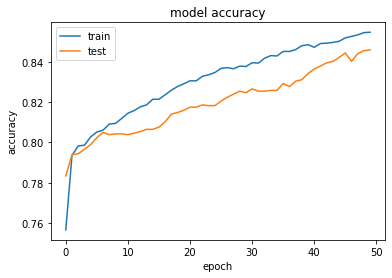

In [14]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

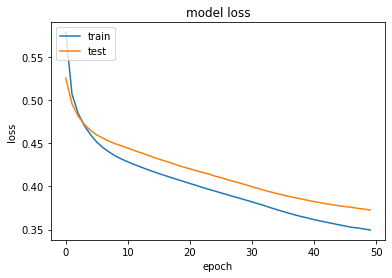

In [15]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred >0.5)

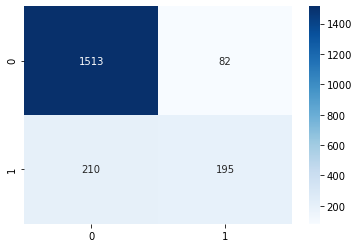

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues')
plt.show()

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.854